In [1]:
# 변수의 shape, type, value 확인
def p(var) :
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [4]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
tf.__version__,keras.__version__

('2.13.0', '2.13.1')

## 2.1 Model 설계 workfolw

### 1. 첫번째 모델 만들기

In [5]:

# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
# 학습
model.fit(x_train, y_train, epochs=3, batch_size=128)
# 시험
classes = model.predict(x_test)
p(classes)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
469/469 [==============================] - 7s 3ms/step - loss: 13.3797 - sparse_categorical_accuracy: 0.8004
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 4.9971 - sparse_categorical_accuracy: 0.8765
Epoch 3/3
313/313 [==============================] - 0s 1ms/step
Shape:(10000, 10)
Type: <class 'numpy.ndarray'>
Values: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 4.0541800e-25 ... 0.0000000e+00
  5.6612263e-34 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.7542305e-31 4.7589381e-22]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  9.4539288e-28 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
# Epoch 1/3
# 469/469 [==============================] - 1s 1ms/step - loss: 479.2211 - accuracy: 0.7711
# Epoch 2/3
# 469/469 [==============================] - 1s 1ms/step - loss: 127.3708 - accuracy: 0.8665
# Epoch 3/3
# 469/469 [==============================] - 1s 1ms/step - loss: 126.8681 - accuracy: 0.8706

### 2. 모델을 만드는 세가지 방법

#### 2.1. Sequential model : Type 1

In [6]:
# 모델 정의 : Sequential model 사용
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 모델 컨텐츠 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# train option 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# training
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 4.1919 - accuracy: 0.7687
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.5834 - accuracy: 0.8651
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.9012


In [8]:
# 모델 정의 : Input Layer 제거
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [9]:
def create_model1():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

model1 = create_model1()
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2.1. Sequential model : Type 2

 - layer를 Sequential method의 매개변수 list로 전달하는 방법

In [10]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(28,28)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 - 모델의 layer graph를 보이고, 파일로 저장

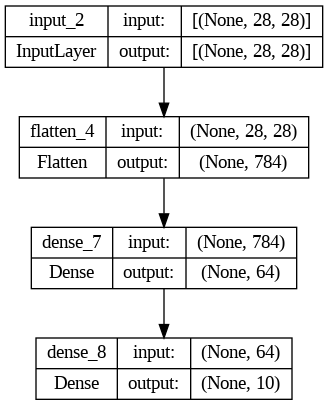

In [11]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

#### 2.2. Functional API

In [12]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_5 (Flatten)         (None, 784)                  0         ['input_3[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 32)                   25120     ['flatten_5[0][0]']           
                                                                                                  
 dense_10 (Dense)            (None, 32)                   25120     ['flatten_5[0][0]']           
                                                                                              

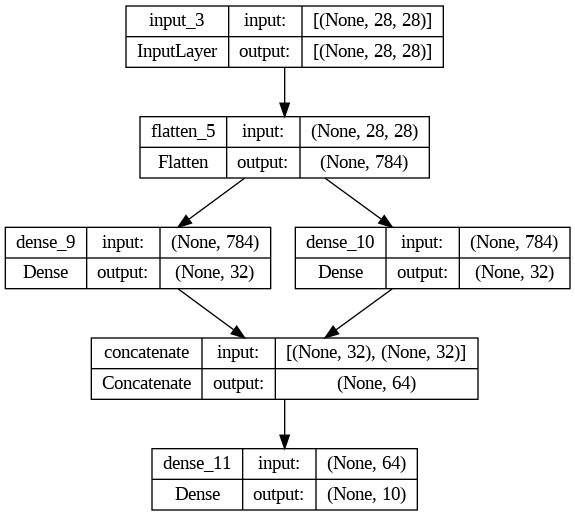

In [13]:
# 1. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
x0 = layers.Flatten()(input_x)
x1 = layers.Dense(32, activation="relu")(x0)
x2 = layers.Dense(32, activation="relu")(x0)
#x1 = layers.Dense(32, activation="relu")(x0[:,:392])
#x2 = layers.Dense(32, activation="relu")(x0[:,392:])
x3 = layers.concatenate([x1, x2])
output_x = layers.Dense(10,activation="softmax")(x3)
# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x)
model.summary()
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [14]:
# train option 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# training
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 4.5057 - accuracy: 0.7674
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.6328 - accuracy: 0.8492
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8938


- show_shapes=Treu : 입출력 텐서의 shape을 보여줌

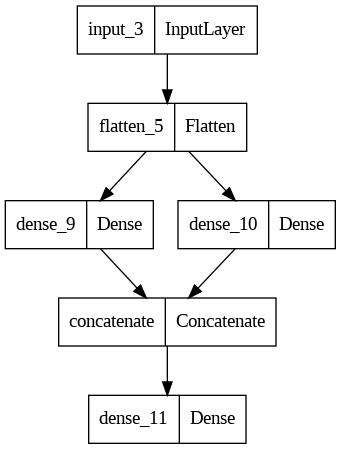

In [15]:
keras.utils.plot_model(model,'model.png')#,show_shapes=True)

In [16]:
def create_model2():
    input_x = keras.Input(shape=(28,28))
    x0 = layers.Flatten()(input_x)
    x1 = layers.Dense(32, activation="relu")(x0)
    x2 = layers.Dense(32, activation="relu")(x0)
    x3 = layers.concatenate([x1, x2])
    output_x = layers.Dense(10,activation="softmax")(x3)
    # 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
    model = keras.Model(inputs=input_x, outputs=output_x)
    return model

model2 = create_model2()
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_6 (Flatten)         (None, 784)                  0         ['input_4[0][0]']             
                                                                                                  
 dense_12 (Dense)            (None, 32)                   25120     ['flatten_6[0][0]']           
                                                                                                  
 dense_13 (Dense)            (None, 32)                   25120     ['flatten_6[0][0]']           
                                                                                            

In [17]:
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(32, activation="relu")
        self.d2 = layers.Dense(32, activation="relu")
        self.d3 = layers.Dense(10, activation="softmax")

    def call(self, x):
        x0 = self.flatten(x)
        x1 = self.d1(x0)
        x2 = self.d2(x0)
        c1 = layers.concatenate([x1, x2])
        return self.d3(c1)

- 모델 인스턴스 생성후 사용

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  25120     
                                                                 
 dense_16 (Dense)            multiple                  25120     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


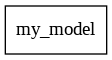

In [18]:
# 1. model instance
model = MyModel()
# 2. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
output_x = model(input_x)
model.summary()
## .utils.plot_model() : Sequntial/Functional API를 위한 것임
keras.utils.plot_model(model,'model.png',show_shapes=True)

**Wrapping**

In [19]:
def create_model3():
    model = MyModel()
    input_x = keras.Input(shape=(28,28))
    output_x = model(input_x)
    return model

model3 = create_model3()
model3.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  25120     
                                                                 
 dense_19 (Dense)            multiple                  25120     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
```python
compile(
    optimizer='rmsprop', loss=None, metrics=None,
    loss_weights=None, weighted_metrics=None,..)
```
---

 - 내장함수의 'name'으로 지정하기

---
```python
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy','mse'])
```
---

- 내장함수를 지정하기

---
```python
model.compile(optimizer=keras.optimizers.RMSprop(
                  learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
```
---

 - 내장함수 또는 사용자함수의 인스턴스로 지정하기

---
```python
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metric_fn = keras.metrics.Accuracy()

model.compile(loss=loss_fn, optimizer=opt, metrics=[metric_fn])
```
---

 - 내장함수의 파라메터가 복잡한 경우

---
```python
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
```
---

---
```python
## default values
model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1,
     callbacks=None, validation_split=0.0, validation_data=None,
     shuffle=True, initial_epoch=0, validation_freq=1,..)
```
---

- return으로 학습과정의 정보 받기

In [20]:
# train option 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
# training
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 3s 4ms/step - loss: 4.1549 - accuracy: 0.7457 - mse: 27.3759
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.6642 - accuracy: 0.8466 - mse: 27.3748
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.8884 - mse: 27.3793


In [21]:
history.history #Epoch별 loss, metric값

{'loss': [4.154878616333008, 0.6642111539840698, 0.45736435055732727],
 'accuracy': [0.7456833124160767, 0.8465833067893982, 0.8883833289146423],
 'mse': [27.375905990600586, 27.374849319458008, 27.37928009033203]}

- 검증 데이터 사용해서 학습과정 모니터링 하기

In [22]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 2s 4ms/step - loss: 0.3531 - accuracy: 0.9115 - mse: 27.3823 - val_loss: 0.4049 - val_accuracy: 0.9162 - val_mse: 27.3302
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.2941 - accuracy: 0.9251 - mse: 27.3838 - val_loss: 0.3628 - val_accuracy: 0.9276 - val_mse: 27.3294
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.2578 - accuracy: 0.9323 - mse: 27.3851 - val_loss: 0.3414 - val_accuracy: 0.9249 - val_mse: 27.3307


In [23]:
history.history

{'loss': [0.3531090021133423, 0.2941341698169708, 0.25779077410697937],
 'accuracy': [0.9115166664123535, 0.925083339214325, 0.932283341884613],
 'mse': [27.38226890563965, 27.383798599243164, 27.385093688964844],
 'val_loss': [0.4049011468887329, 0.3628060221672058, 0.3413673937320709],
 'val_accuracy': [0.9161999821662903, 0.9276000261306763, 0.9248999953269958],
 'val_mse': [27.330156326293945, 27.329381942749023, 27.330747604370117]}

In [24]:
#Test dataset에 대한 평균 loss, metric
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.9249 - mse: 27.3308


[0.3413673937320709, 0.9248999953269958, 27.330753326416016]

In [25]:
# returen : loss + metrics
values = model.evaluate(x=x_test, y=y_test, batch_size=1024,verbose=0)
p(values)

Type: <class 'list'>
Values: [0.3413675129413605, 0.9248999953269958, 27.33074378967285]


In [26]:
p(values)

Type: <class 'list'>
Values: [0.3413675129413605, 0.9248999953269958, 27.33074378967285]


In [27]:
y_predict = model.predict(x_test)
p(y_predict[0,:])

313/313 [==============================] - 1s 1ms/step
Shape:(10,)
Type: <class 'numpy.ndarray'>
Values: [3.9750957e-35 9.2066016e-32 3.0883632e-06 4.9096244e-10 4.1653697e-36
 7.3963672e-37 0.0000000e+00 9.9999690e-01 2.2188514e-31 5.9756950e-17]


- category 값으로 변환하기: argmax() 가장큰값의 index를 반환

In [28]:
import numpy as np
index = np.argmax(model.predict(x_test), axis=-1)
p(index)
p(y_test)

313/313 [==============================] - 0s 1ms/step
Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 5 6]
Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 5 6]


In [29]:
## metric에 'mse' 추가 했음, 문제점은??
import tensorflow.keras as keras
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy','mse'])
# 학습
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 230.7624 - accuracy: 0.8299 - mse: 27.3945
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 142.2128 - accuracy: 0.8631 - mse: 27.3944
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 130.5868 - accuracy: 0.8693 - mse: 27.3944


In [30]:
p(y_test)

Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 5 6]


In [31]:
## MSE 값을 확인, why??
## 수정된 부분은?
import tensorflow.keras as keras
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train,depth=10) ##
y_test = tf.one_hot(y_test,depth=10)   ##

# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy',  ##
              optimizer='sgd',
              metrics=['accuracy','mse'])
# 학습
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 219.1725 - accuracy: 0.8299 - mse: 0.0340
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 140.6310 - accuracy: 0.8646 - mse: 0.0270
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 134.2083 - accuracy: 0.8685 - mse: 0.0263


**rank, shape, axis**

In [32]:
## rank, shape, axis
d = np.zeros((2,3,4))
print(d.ndim)
p(d)
# #of_rank = 3
# shape=(2,3,4),
# axis:(0,1,2) or (0,1,-1)
#     (z, y, x)

3
Shape:(2, 3, 4)
Type: <class 'numpy.ndarray'>
Values: [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


default values

---
```python
model.compile(optimizer='rmsprop', loss=None, metrics=None,
              loss_weights=None, weighted_metrics=None,.. )
```
---

- 내장된 함수, 알고리즘들

```python
# 내장 Optimizers
class Adadelta: Optimizer that implements the Adadelta algorithm.
class Adagrad: Optimizer that implements the Adagrad algorithm.
class Adam: Optimizer that implements the Adam algorithm.
class Adamax: Optimizer that implements the Adamax algorithm.
class Ftrl: Optimizer that implements the FTRL algorithm.
class Nadam: Optimizer that implements the NAdam algorithm.
class Optimizer: Updated base class for optimizers.
class RMSprop: Optimizer that implements the RMSprop algorithm.
class SGD: Stochastic gradient descent and momentum optimizer.
```

``` python
#  내장 loss functions
class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.
class CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
class CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.
class CosineSimilarity: Computes the cosine similarity between y_true and y_pred.
class Hinge: Computes the hinge loss between y_true and y_pred.
class Huber: Computes the Huber loss between y_true and y_pred.
class KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.
class LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.
class Loss: Loss base class.
class MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.
class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.
class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.
class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.
class Poisson: Computes the Poisson loss between y_true and y_pred.
class Reduction: Types of loss reduction.
class SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
class SquaredHinge: Computes the squared hinge loss between y_true and y_pred.
```

```python
# 내장 metric functions
class AUC: Computes the approximate AUC (Area under the curve) via a Riemann sum.
class Accuracy: Calculates how often predictions equals labels.
class BinaryAccuracy: Calculates how often predictions matches binary labels.
class BinaryCrossentropy: Computes the crossentropy metric between the labels and predictions.
class CategoricalAccuracy: Calculates how often predictions matches one-hot labels.
class CategoricalCrossentropy: Computes the crossentropy metric between the labels and predictions.
class CategoricalHinge: Computes the categorical hinge metric between y_true and y_pred.
class CosineSimilarity: Computes the cosine similarity between the labels and predictions.
class FalseNegatives: Calculates the number of false negatives.
class FalsePositives: Calculates the number of false positives.
class Hinge: Computes the hinge metric between y_true and y_pred.
class KLDivergence: Computes Kullback-Leibler divergence metric between y_true and y_pred.
class LogCoshError: Computes the logarithm of the hyperbolic cosine of the prediction error.
class Mean: Computes the (weighted) mean of the given values.
class MeanAbsoluteError: Computes the mean absolute error between the labels and predictions.
class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.
class MeanIoU: Computes the mean Intersection-Over-Union metric.
class MeanRelativeError: Computes the mean relative error by normalizing with the given values.
class MeanSquaredError: Computes the mean squared error between y_true and y_pred.
class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.
class MeanTensor: Computes the element-wise (weighted) mean of the given tensors.
class Metric: Encapsulates metric logic and state.
class Poisson: Computes the Poisson metric between y_true and y_pred.
class Precision: Computes the precision of the predictions with respect to the labels.
class PrecisionAtRecall: Computes the precision at a given recall.
class Recall: Computes the recall of the predictions with respect to the labels.
class RecallAtPrecision: Computes the maximally achievable recall at a required precision.
class RootMeanSquaredError: Computes root mean squared error metric between y_true and y_pred.
class SensitivityAtSpecificity: Computes the sensitivity at a given specificity.
class SparseCategoricalAccuracy: Calculates how often predictions matches integer labels.
class SparseCategoricalCrossentropy: Computes the crossentropy metric between the labels and predictions.
class SparseTopKCategoricalAccuracy: Computes how often integer targets are in the top K predictions.
class SpecificityAtSensitivity: Computes the specificity at a given sensitivity.
class SquaredHinge: Computes the squared hinge metric between y_true and y_pred.
class Sum: Computes the (weighted) sum of the given values.
class TopKCategoricalAccuracy: Computes how often targets are in the top K predictions.
class TrueNegatives: Calculates the number of true negatives.
class TruePositives: Calculates the number of true positives.
```

함수 인스턴스로 compile 인수 설정하기

---
```python
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metric_fn = keras.metrics.Accuracy()

model.compile(loss=loss_fn, optimizer=opt, metrics=[metric_fn])
```
---

##### - 사용자 loss, metric함수 만들기

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

model = create_model1()

# loss 함수 만들기
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))
# metric 함수 만들기
def custom_mean_error(y_true, y_pred):
    return tf.math.reduce_mean(y_true - y_pred)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=custom_mean_squared_error,
              metrics=['Accuracy',custom_mean_error])

# MSE 계산을 위해 레이블을 one-hot encoding
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=3)

Epoch 1/3
938/938 [==============================] - 5s 3ms/step - loss: 0.1801 - Accuracy: 0.0993 - custom_mean_error: 9.9288e-14
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1802 - Accuracy: 0.0992 - custom_mean_error: 0.0000e+00
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1802 - Accuracy: 0.0992 - custom_mean_error: 0.0000e+00


---
```python
## fit() arguments, default values
Model.fit(
    x=None,                       # 입력 데이터
    y=None,                       # 대상 데이터
    batch_size=None,              # 그라디언트 업데이트 / 샘플 수
    epochs=1,                     # 모델을 훈련시킬 에포크 수
    verbose=1,                    # 0 = 무음, 1 = 진행률 표시 줄, 2 = 에포크 당 한 줄
    callbacks=None,               # keras.callbacks.Callback인스턴스 list   
    validation_split=0.0,         # 검증 데이터로 사용될 훈련 데이터의 비율
    validation_data=None,         # 각 에포크의 끝에서 모델 메트릭을 평가할 데이터
    shuffle=True,                 # 각 에포크 전에 훈련 데이터를 임의 순서로 섞을 것인지
    class_weight=None,            # 손실 함수의 가중치를 부여하는 데 사용, 부족한 클래스에 가중치 제공
    sample_weight=None,           # 손실 기능의 가중치를 부여하는 데 사용, 샘플들 간에 다른 가중치 제공
    initial_epoch=0,              # 훈련을 시작할 시점, 훈련을 재개하는 데 유용
    steps_per_epoch=None,         # 에포크의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시
    validation_steps=None,        # 검증의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시
    validation_batch_size=None,   # 검증 배치 당 샘플 수, 지정되지 않은 경우 batch_size
    validation_freq=1,            # 지정한 에포크끝에서 검증 수행, ( =5, =[1, 2, 10] )
    max_queue_size=10,            # generator 또는 Sequence 입력에만 사용, 최대 generator 큐
    workers=1,                    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드
    use_multiprocessing=False,    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드
)
```
---

- callback 사용하기

다음과 같은 형태로 callback에 여러개의 함수를 적용할 수 있습니다.

---
```python
def scheduler(epoch, lr):
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.001  # lr, 0.01, 0.001, ...
    else:
        return lr * tf.math.exp(0.002 * (10 - epoch))

my_callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5),
    keras.callbacks.LearningRateScheduler(scheduler),
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='./ckpt/cp.ckpt',
                                    save_best_only=True, save_weights_only=False,),
             ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))
```
---

In [34]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

model = create_model1()

# compile option
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
# fit option : EarlyStoping 설정
my_callbacks = [ keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2), ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 18.1323 - accuracy: 0.7053 - val_loss: 4.9111 - val_accuracy: 0.8489
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 3.7320 - accuracy: 0.8601 - val_loss: 3.0283 - val_accuracy: 0.8740
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 2.3755 - accuracy: 0.8823 - val_loss: 2.2241 - val_accuracy: 0.8828
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 1.7370 - accuracy: 0.8908 - val_loss: 1.7364 - val_accuracy: 0.8869
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 1.2992 - accuracy: 0.8999 - val_loss: 1.4507 - val_accuracy: 0.8891
Epoch 6/100
59/59 [==============================] - 0s 4ms/step - loss: 1.0328 - accuracy: 0.9043 - val_loss: 1.2313 - val_accuracy: 0.8928
Epoch 7/100
59/59 [==============================] - 0s 4ms/step - loss: 0.8353 - accuracy: 0.9082 - val_loss: 1.0933 - val_accuracy: 0.8953
Epoch 8/100


---
```python
epoch = 100

def scheduler(epoch):
    initial_lrate = 0.01
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.01  # lr, 0.01, 0.001, ...
    else:
        return initial_lrate * tf.math.exp(0.03 * (10 - epoch))

my_callbacks = [ keras.callbacks.LearningRateScheduler(scheduler), ]
model.fit(x_train,y_train, epochs=20, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))
```
---

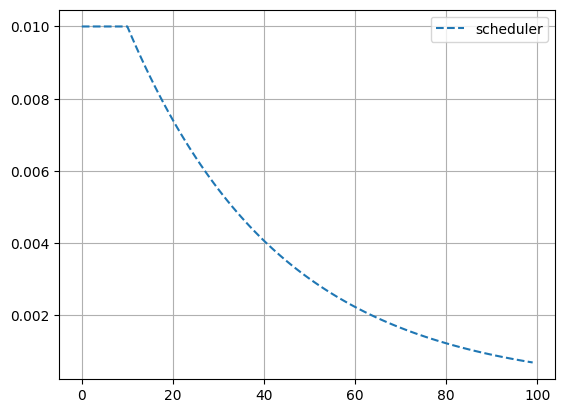

In [36]:
import matplotlib.pylab as plt

epoch = 100

def scheduler(epoch):
    initial_lrate = 0.01
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.01  # lr, 0.01, 0.001, ...
    else:
        return initial_lrate * tf.math.exp(0.03 * (10 - epoch))

lr=[]

for step in range(epoch):
    lr.append(scheduler(step))

plt.plot(lr, linestyle='--', label="scheduler")

plt.legend()
plt.grid()
plt.show()

ExponentialDecay

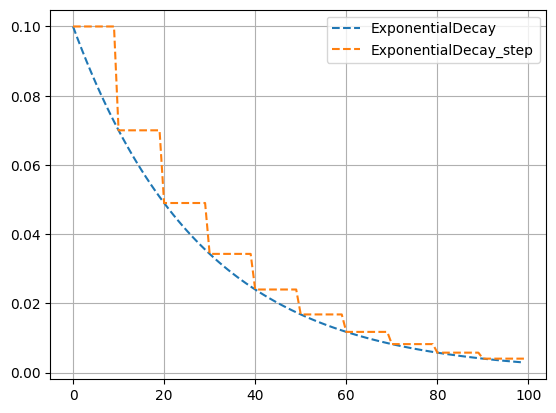

In [37]:
def ExponentialDecay(step,staircase=False):
    initial_lrate = 0.1
    decay_steps = 10
    decay_rate=0.7
    if staircase :
        return initial_lrate * decay_rate ** (step // decay_steps)
    return initial_lrate * decay_rate ** (step / decay_steps)

lr=[]
lr_s=[]
for step in range(100):
    lr.append(ExponentialDecay(step,staircase=False))
    lr_s.append(ExponentialDecay(step,staircase=True))


import matplotlib.pylab as plt

plt.plot(lr, linestyle='--', label="ExponentialDecay")
plt.plot(lr_s, linestyle='--', label="ExponentialDecay_step")

plt.legend()
plt.grid()
plt.show()

PolynomialDecay

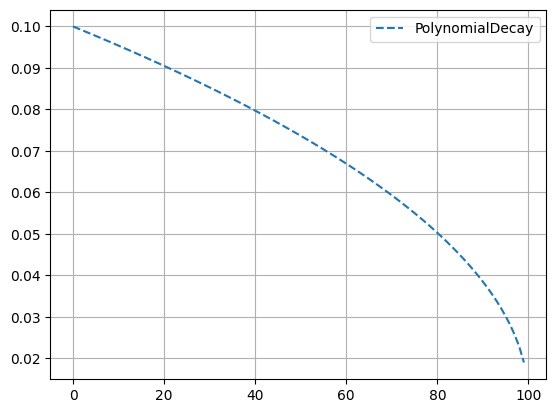

In [38]:
def PolynomialDecay(step):
    initial_lrate = 0.1
    end_lrate = 0.01
    decay_steps = 100  # = epochs
    power=0.5
    step = min(step, decay_steps)
    return (((initial_lrate - end_lrate)
           * (1 - step / decay_steps) ** (power) ) + end_lrate)

lr=[]

for step in range(100):
    lr.append(PolynomialDecay(step))

plt.plot(lr, linestyle='--', label="PolynomialDecay")

plt.legend()
plt.grid()
plt.show()

InverseTimeDecay

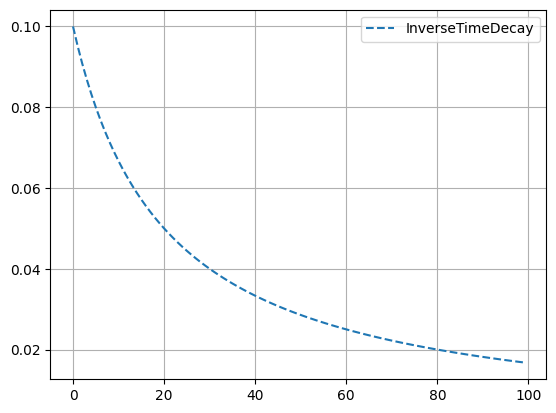

In [39]:
def InverseTimeDecay(step):
    initial_lrate = 0.1
    decay_steps = 10
    decay_rate = 0.5

    return initial_lrate / (1 + decay_rate * step / decay_steps)

lr=[]
for step in range(100):
    lr.append(InverseTimeDecay(step))

plt.plot(lr, linestyle='--', label="InverseTimeDecay")

plt.legend()
plt.grid()
plt.show()

In [40]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# one hot encode target values
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)
#x_train = x_train/255.  ##
#x_test = x_test/255.    ##



In [41]:
model = create_model1()

initial_lrate = 0.005
# compile option
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=initial_lrate),
              metrics=['accuracy'])

## learning rate schdueler와 비교하기 위해서 저장
history1 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                      validation_data=(x_test, y_test), verbose=2 )

Epoch 1/50
59/59 - 2s - loss: 19.6678 - accuracy: 0.5985 - val_loss: 1.1007 - val_accuracy: 0.6699 - 2s/epoch - 31ms/step
Epoch 2/50
59/59 - 0s - loss: 1.0749 - accuracy: 0.7150 - val_loss: 1.0891 - val_accuracy: 0.7085 - 399ms/epoch - 7ms/step
Epoch 3/50
59/59 - 0s - loss: 0.8110 - accuracy: 0.8015 - val_loss: 0.6514 - val_accuracy: 0.8701 - 340ms/epoch - 6ms/step
Epoch 4/50
59/59 - 0s - loss: 0.6137 - accuracy: 0.8608 - val_loss: 0.4851 - val_accuracy: 0.8973 - 350ms/epoch - 6ms/step
Epoch 5/50
59/59 - 0s - loss: 0.5171 - accuracy: 0.8856 - val_loss: 0.5854 - val_accuracy: 0.8916 - 327ms/epoch - 6ms/step
Epoch 6/50
59/59 - 0s - loss: 0.4442 - accuracy: 0.8974 - val_loss: 0.9190 - val_accuracy: 0.8758 - 247ms/epoch - 4ms/step
Epoch 7/50
59/59 - 0s - loss: 0.4220 - accuracy: 0.9045 - val_loss: 0.4863 - val_accuracy: 0.8855 - 205ms/epoch - 3ms/step
Epoch 8/50
59/59 - 0s - loss: 0.3957 - accuracy: 0.9028 - val_loss: 0.4911 - val_accuracy: 0.9010 - 253ms/epoch - 4ms/step
Epoch 9/50
59/59 

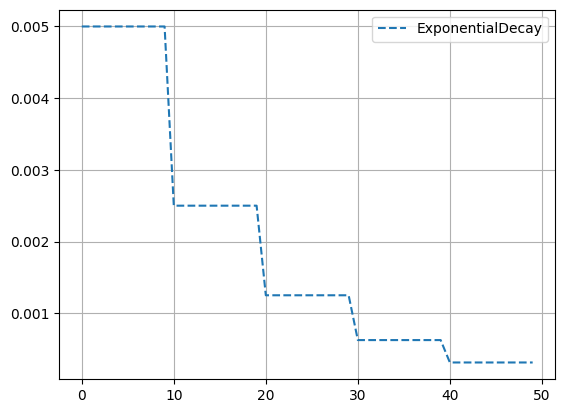

In [42]:
def ExponentialDecay_s(step):
    initial_lrate = 0.005
    decay_steps = 10.
    decay_rate=0.5
    return initial_lrate * decay_rate ** (step // decay_steps)

lr=[]
for step in range(50):
    lr.append(ExponentialDecay_s(step))

import matplotlib.pylab as plt

plt.plot(lr, linestyle='--', label="ExponentialDecay")

plt.legend()
plt.grid()
plt.show()

In [43]:
model = create_model1()

# compile option
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

my_callbacks = [ keras.callbacks.LearningRateScheduler(ExponentialDecay_s,verbose=1) ]
history2 = model.fit(x_train,y_train, epochs=50, batch_size=1024, callbacks=my_callbacks,
                      validation_data=(x_test, y_test), verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.005.
Epoch 1/50
59/59 - 1s - loss: 33.8718 - accuracy: 0.7277 - val_loss: 3.6253 - val_accuracy: 0.8332 - lr: 0.0050 - 1s/epoch - 24ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.005.
Epoch 2/50
59/59 - 0s - loss: 1.4347 - accuracy: 0.7760 - val_loss: 1.0487 - val_accuracy: 0.7718 - lr: 0.0050 - 214ms/epoch - 4ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.005.
Epoch 3/50
59/59 - 0s - loss: 0.7772 - accuracy: 0.8270 - val_loss: 0.6579 - val_accuracy: 0.8659 - lr: 0.0050 - 219ms/epoch - 4ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.005.
Epoch 4/50
59/59 - 0s - loss: 0.5215 - accuracy: 0.8838 - val_loss: 0.4204 - val_accuracy: 0.8999 - lr: 0.0050 - 247ms/epoch - 4ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.005.
Epoch 5/50
59/59 - 0s - loss: 0.4130 - accuracy: 0.9046 - val_loss: 0.4650 - val_accuracy: 0.9092 - lr: 0.0050 - 239ms/epoch - 4ms/step



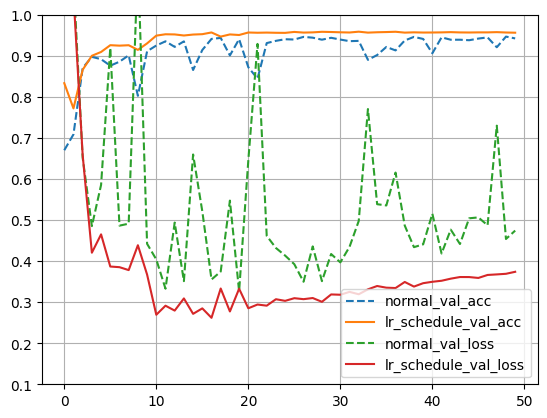

In [44]:
import matplotlib.pylab as plt

plt.plot(history1.history['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="lr_schedule_val_loss")

plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show()

![image.png](attachment:e22f5cd9-3818-40ea-84c2-b356f8a2a5a3.png)

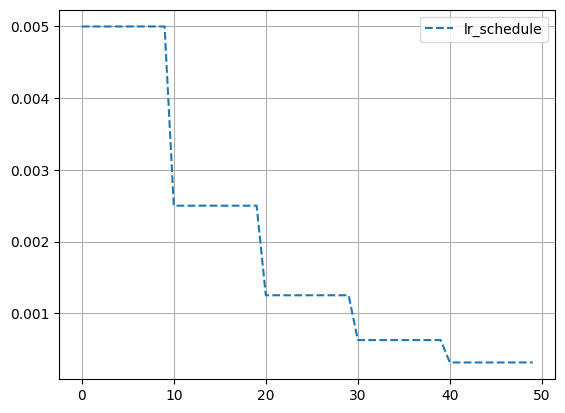

In [45]:
plt.plot(history2.history['lr'],
         linestyle='--', label="lr_schedule")
plt.legend()
plt.grid()
plt.show()

---
```python
# 내장된 Scheduler함수들
tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate, decay_steps, end_learning_rate=0.0001, power=1.0,
    cycle=False, name=None
)
tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
```
---

- 내장함수로 lr scheduling 하기  

In [46]:
# 1. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
x0 = layers.Flatten()(input_x)
x1 = layers.Dense(32, activation="relu")(x0)
x2 = layers.Dense(32, activation="relu")(x0)
x3 = layers.concatenate([x1, x2])
output_x = layers.Dense(10,activation="softmax")(x3)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x)

lr_fn = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate= 0.01,
                decay_steps=20,
                decay_rate=0.96,
                staircase=True)
# compile option
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=lr_fn),
              metrics=['accuracy'])

history2 = model.fit(x_train,y_train, epochs=20, batch_size=1024,
                      validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
59/59 - 1s - loss: 73.7615 - accuracy: 0.6632 - val_loss: 1.5065 - val_accuracy: 0.7079 - 1s/epoch - 23ms/step
Epoch 2/20
59/59 - 0s - loss: 1.2284 - accuracy: 0.7006 - val_loss: 1.7804 - val_accuracy: 0.6718 - 245ms/epoch - 4ms/step
Epoch 3/20
59/59 - 0s - loss: 0.9375 - accuracy: 0.7666 - val_loss: 0.9091 - val_accuracy: 0.7264 - 337ms/epoch - 6ms/step
Epoch 4/20
59/59 - 0s - loss: 0.6445 - accuracy: 0.8449 - val_loss: 0.5577 - val_accuracy: 0.8892 - 296ms/epoch - 5ms/step
Epoch 5/20
59/59 - 0s - loss: 0.5204 - accuracy: 0.8798 - val_loss: 0.4740 - val_accuracy: 0.9083 - 302ms/epoch - 5ms/step
Epoch 6/20
59/59 - 0s - loss: 0.4151 - accuracy: 0.9052 - val_loss: 0.4722 - val_accuracy: 0.9071 - 285ms/epoch - 5ms/step
Epoch 7/20
59/59 - 0s - loss: 0.3641 - accuracy: 0.9154 - val_loss: 0.7504 - val_accuracy: 0.8647 - 321ms/epoch - 5ms/step
Epoch 8/20
59/59 - 0s - loss: 0.3211 - accuracy: 0.9243 - val_loss: 0.3485 - val_accuracy: 0.9219 - 315ms/epoch - 5ms/step
Epoch 9/20
59/59 

*Notebook내부에서 실행하기 : 설치환경의 영향을 많이 받음*
>#!rm -rf ./logs/    #colab(linux)    
>#*jupyter notebook 내에서 보기위해*   
>%load_ext tensorboard  
>#*로그 패스와 함께 텐서보드 실행*  
>%tensorboard --logdir ./logs  

*별도 브라우저에서 실행하기*
* 1) terminal window에서 실행
>tensorboard --logdir ./logs
* 2) browser에서
>"localhost:6006/" 접속